Informacion recopilada por el detector: 30.00 KB
Tiempo de transmision detector: 0.24 s
Peso de una imagen JPEG: 360.00 KB
Peso total de 50 imágenes JPEG: 18000.00 KB
Tiempo de transmision camara: 144.00 s
--------------------
Tiempo de transmision requerido: 144.24 s
[30.0, 18000.0]
At minute 0.0, no task is running.
At minute 1.0, no task is running.
At minute 2.0, no task is running.
At minute 3.0, no task is running.
At minute 4.0, no task is running.
At minute 5.0, no task is running.
At minute 6.0, no task is running.
At minute 7.0, no task is running.
At minute 8.0, no task is running.
At minute 9.0, no task is running.
At minute 10.0, no task is running.
At minute 11.0, no task is running.
At minute 12.0, no task is running.
At minute 13.0, no task is running.
At minute 14.0, no task is running.
At minute 15.0, no task is running.
At minute 16.0, no task is running.
At minute 17.0, no task is running.
At minute 18.0, no task is running.
At minute 19.0, no task is running.
At mi

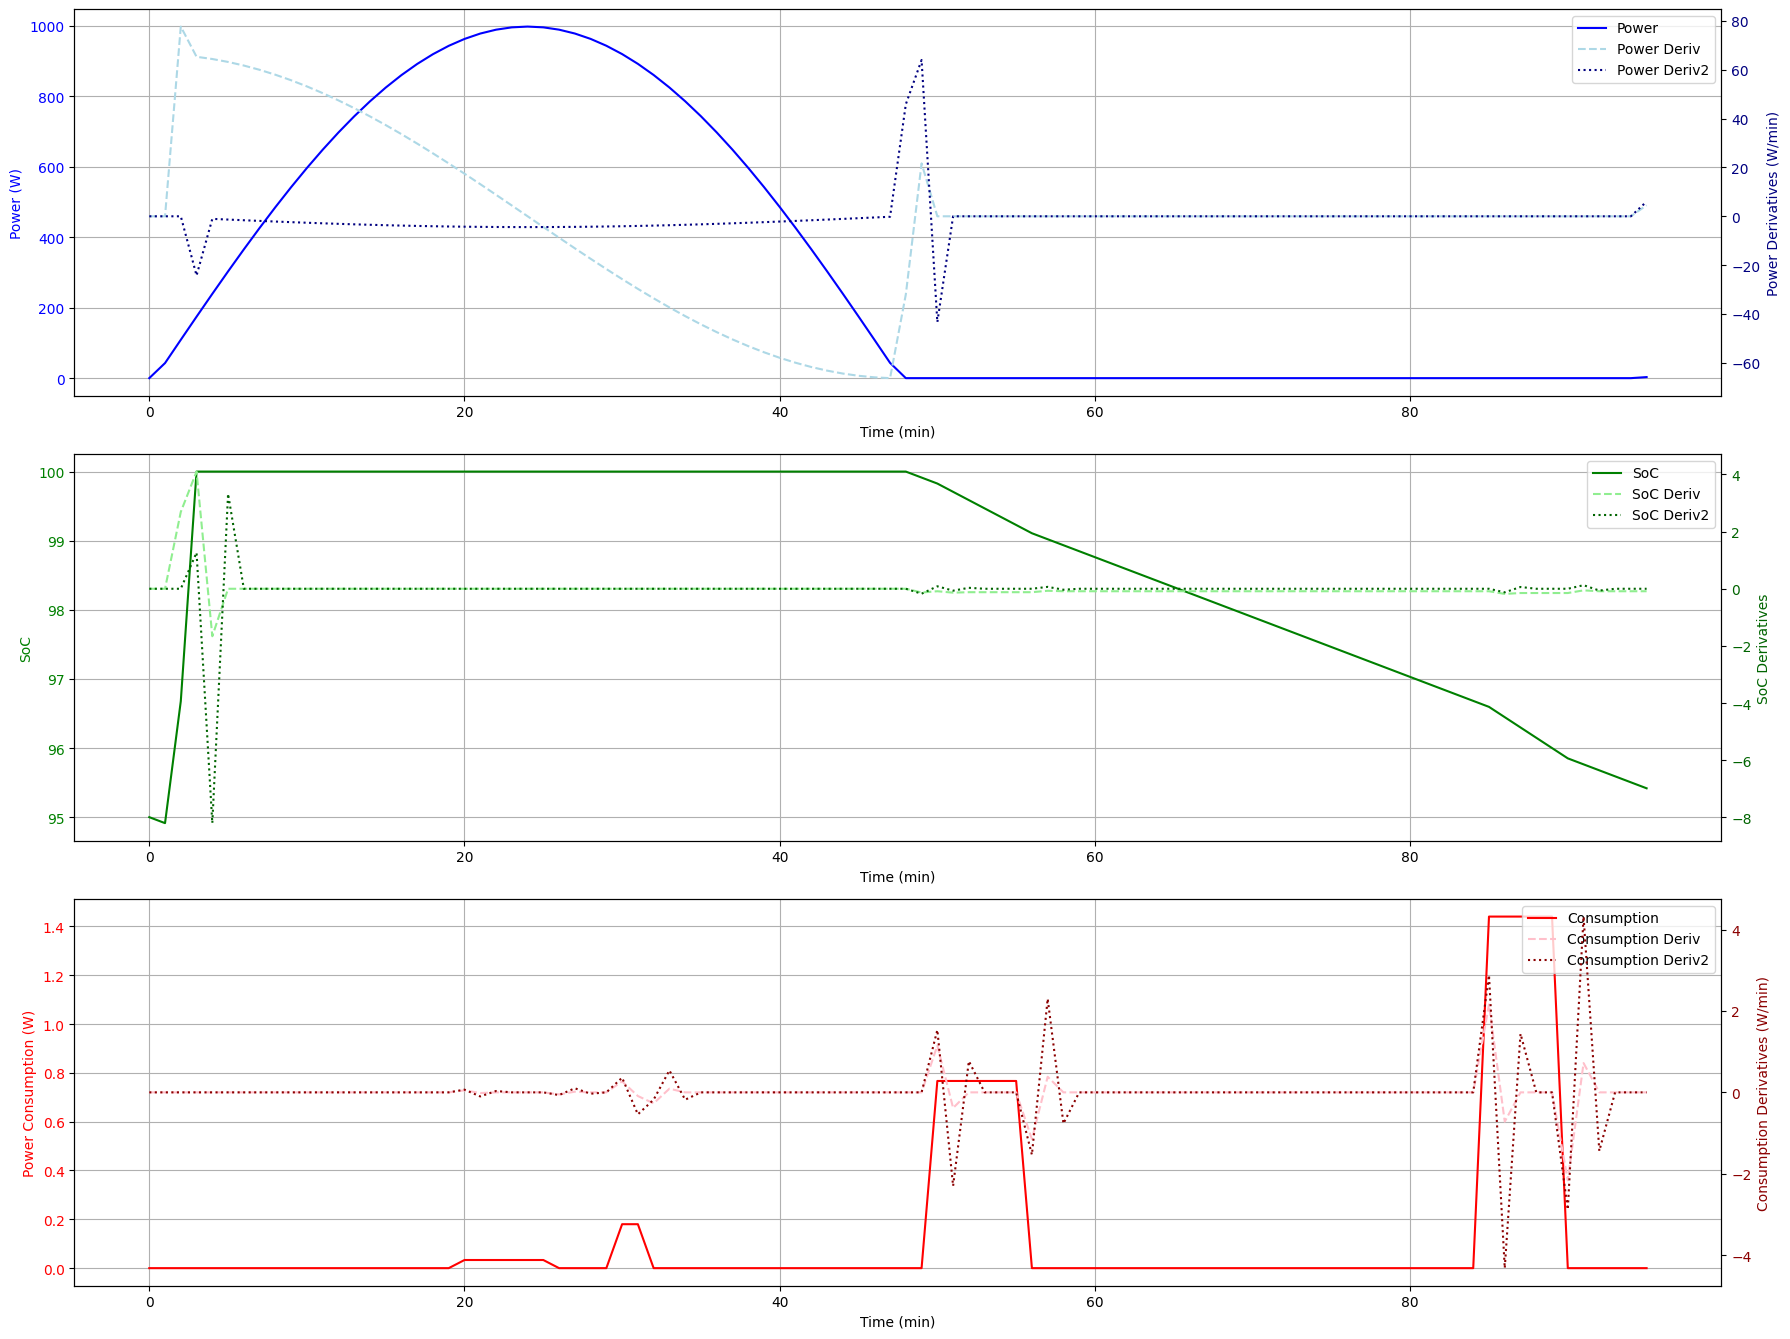

Time in each SoC range: {'0%-10%': 0, '10%-20%': 0, '20%-30%': 0, '30%-40%': 0, '40%-50%': 0, '50%-60%': 0, '60%-70%': 0, '70%-80%': 0, '80%-90%': 0, '90%-100%': 96.0}
Performance score: 100.41841004184101
State Vector: [0.0 42.735435272854474 108.76644097030811 174.3178096194551
 239.1004735199036 302.8287547969564 365.22162518074873 426.0039452816017
 484.9076778966571 541.6730699973745 596.0497981855613 647.7980725667222
 696.6896941728891 742.5090612719026 785.0541201255446 824.1372560038818
 859.5861205266226 891.2443916831011 918.9724631793501 942.6480600723895
 962.1667779769211 977.4425434666292 988.4079936398252 995.0147731756266
 997.2337475707147 995.0551316163469 988.4885325490604 977.5629076847881
 962.3264367232061 942.846309285427 919.2084286219532 891.5170327974714
 859.8942350229895 824.4794851623471 785.4289547877511 742.9148484961031
 697.1246445230705 648.2602680036414 596.5372005248931 542.1835298976749
 485.43894433750245 426.55367549011845 365.78739496274403
 303

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm, chisquare
from math import pi, cos
from keras.models import Sequential
from keras.layers import Dense, Input
from math import exp, pi, cos  # Make sure exp is imported here
import tensorflow as tf

phase = np.random.rand() * 2 * pi
PtBatMax, PtMaxPanel = 38.48, 24.24
K, Eff = 191.1, 21.528 / 100
TInitial, TFinal, Dt = 0.0, 94.6, 1.0
SocInitial, HardDeck, SoftDeck = 95, 20, 30
NomConsum = 2
VOLTAGE = 12.0
ImageResolution=[1024,768] #JPEG high defitnition

TasksDf = pd.DataFrame({
    'TaskID': [1, 2, 3, 4], #ID1:EPC,ID2:COMMRX,ID3:Camera,ID4:COMMTX
    'Power': [0.2, 0.36, 4.6, 7.2],
    'StartTime': [20, 30, 50, 85],
    'Duration': [5, 1, 5, 4],
    'PriorityTransmission': [0.3, 0.7, 0.6, 1],
    'PriorityExecution': [0.2, 1, 0.1, 0.9]
    
})

# Define the dispersion (σ) as a constant for now
sigma = 1  # Adjust this as necessary

# Define the g(k) function
def g(k):
    if k == 1:
        return 1
    elif k == 2:
        return 0.5
    elif k == 3:
        return 0.25
    else:
        return 0

def task_reward(task, t_required, t_actual, sigma, d, k):
    s_j = 1 if task['TaskID'] in historical_task_status else 0
    p_j = task['PriorityExecution']
    t_f = t_actual - t_required
    gaussian_penalty = exp(-(t_f ** 2) / (2 * sigma ** 2))
    return s_j * p_j * gaussian_penalty * d * g(k)

def calcular_peso_imagen(resolucion, factor_compresion):
  """
Calculates the weight of a JPEG image in kilobytes.

   Args:
     resolution: List with the width and height of the image (in pixels).
     compression_factor: JPEG compression factor (between 0 and 1).

   Returns:
     Image weight in kilobytes.
  """
  ancho, altura = resolucion
  peso_imagen = (ancho * altura * 3) / (8 * factor_compresion) #3 byte/pixel
  return peso_imagen / 1024  # Convertir a kilobytes




def calcular_consumo_informacion(frecuencia_captura, peso_imagen):
  """
  Calcula el consumo de información en megabytes por segundo.

  Args:
    frecuencia_captura: Frecuencia de captura de imágenes (en imágenes por segundo).
    peso_imagen: Peso de una imagen en kilobytes.

  Returns:
    Consumo de información en megabytes por segundo.
  """

  consumo_informacion = frecuencia_captura * peso_imagen * 8 * TasksDf.Duration[2] * 60
  return consumo_informacion / 1048576  # Convertir a megabytes por segundo
#DETECTOR PARTICULAS
tasa_de_captura_datos = 10 #eventos por segundo
tamaño_evento = 10 #Bytes
informacion_recopilada_detector = (tasa_de_captura_datos* tamaño_evento * 60)/1000 #Informacion en KB por minuto
informacion_recopilada_detector_total=informacion_recopilada_detector* TasksDf.Duration[0] #Informacion recopilada con respecto a la duracion de la tarea.
print(f"Informacion recopilada por el detector: {informacion_recopilada_detector_total:.2f} KB")
tamaño_bits_detector = informacion_recopilada_detector_total* 8 # 8:8bits/KB
tiempo_transmision_detector= tamaño_bits_detector/1e3 #1: 1Mbps debido a la banda S
print(f"Tiempo de transmision detector: {(tiempo_transmision_detector):.2f} s")
#CAMARA
peso_imagen_unica = calcular_peso_imagen(ImageResolution, 0.8)
print(f"Peso de una imagen JPEG: {peso_imagen_unica:.2f} KB")
frecuencia_captura =10  # 10 imágenes por minuto
consumo_informacion = calcular_consumo_informacion(frecuencia_captura, peso_imagen_unica)
peso_total_imagenes = TasksDf.Duration[2]*frecuencia_captura* peso_imagen_unica
print(f"Peso total de {frecuencia_captura*TasksDf.Duration[2]} imágenes JPEG: {peso_total_imagenes:.2f} KB")
tamaño_bits_imagenes = peso_total_imagenes* 8 # 8:8bits/KB
tiempo_transmision_camara= tamaño_bits_imagenes/1e3 #1: 1Mbps debido a la banda S
print(f"Tiempo de transmision camara: {(tiempo_transmision_camara):.2f} s")
print(f"--------------------")
tiempo_detector_camara_total = tiempo_transmision_detector + tiempo_transmision_camara
print(f"Tiempo de transmision requerido: {(tiempo_detector_camara_total):.2f} s")
vector_datos_generados= [informacion_recopilada_detector_total,peso_total_imagenes] #KB
print(vector_datos_generados)

# Define the overall reward function
def total_reward(tasks_df, historical_task_status, socs, E_max, E_L, alpha, sigma, k):
    Y_j_total = sum(task_reward(task, task['StartTime'], task['Duration'], sigma, 1, k) for _, task in tasks_df.iterrows())
    soc_penalty = alpha * sum(((E_i - E_L) / (E_max - E_L)) for E_i in socs)
    return Y_j_total - soc_penalty

def available_power(t, phase, k, efficiency, pt_max_panel):
    return max(pt_max_panel * cos(2 * pi * t / TFinal + phase) * efficiency * k, 0)

def execute_tasks(times, tasks_df):
    consumption = np.zeros(len(times))
    task_active = np.zeros(len(times), dtype=bool)
    data_generated = np.zeros(len(tasks_df))  # Vector to store data sizes generated
    historical_task_status = np.zeros((len(times), len(tasks_df)), dtype=int)  # Track historical active status for all tasks

    for index, task in tasks_df.iterrows():
        start_index = np.argmax(times >= task['StartTime'])
        end_index = np.argmax(times >= task['StartTime'] + task['Duration'])
        if start_index and end_index:
            consumption[start_index:end_index + 1] += task['Power'] / (end_index - start_index + 1)
            task_active[start_index:end_index + 1] = True
            data_generated[index] = np.random.randint(100, 501)  # Generates random data size between 100 and 500 KB
            historical_task_status[start_index:end_index + 1, index] = 1  # Mark as active during the task duration

    # Preserve historical status of tasks that have been executed
    for t in range(1, len(times)):
        historical_task_status[t] |= historical_task_status[t-1]
        
    return consumption, historical_task_status, task_active, data_generated

def is_task_running(times, task_active):
    for t, active in zip(times, task_active):
        if active:
            print(f"At minute {t}, a task is running.")
        else:
            print(f"At minute {t}, no task is running.")

def manage_soc(times, power, consumption, soc_initial, pt_bat_max, dt, nom_consum):
    soc = np.zeros(len(times))
    soc[0] = soc_initial
    for i in range(1, len(times)):
        energy_generated = power[i - 1] * dt / 60
        energy_consumed = (nom_consum + consumption[i - 1]) * dt / 60
        soc[i] = soc[i - 1] + (energy_generated - energy_consumed) * 100 / pt_bat_max
        soc[i] = max(0, min(100, soc[i]))
    return soc

def calculate_derivatives(data, dt):
    d1 = np.zeros(len(data))
    d2 = np.zeros(len(data))
    for i in range(2, len(data)):
        d1[i] = (3 * data[i] - 4 * data[i - 1] + data[i - 2]) / (2 * dt)
        if i > 2:
            d2[i] = (2 * data[i] - 5 * data[i - 1] + 4 * data[i - 2] - data[i - 3]) / dt**2
    return d1, d2

def sample_parameters(n):
    sampled_params = []
    for _ in range(n):
        k_sampled = norm.rvs(191.1, 5)
        eff_sampled = norm.rvs(0.21528, 0.01)
        sampled_params.append((k_sampled, eff_sampled))
    return sampled_params

def analyze_time_in_soc_ranges(socs, dt):
    ranges = np.arange(0, 110, 10)
    time_in_ranges = {}
    for i in range(len(ranges) - 1):
        range_key = f"{ranges[i]}%-{ranges[i+1]}%"
        time_in_ranges[range_key] = 0

    for soc in socs:
        for i in range(len(ranges) - 1):
            if ranges[i] <= soc < ranges[i+1]:
                range_key = f"{ranges[i]}%-{ranges[i+1]}%"
                time_in_ranges[range_key] += dt
                break

        if soc == 100:
            range_key = f"{ranges[-2]}%-{ranges[-1]}%"
            time_in_ranges[range_key] += dt

    return time_in_ranges

def evaluate_performance(time_in_ranges):
    performance_score = 0
    for range_key, time in time_in_ranges.items():
        if "20%-30%" in range_key:
            performance_score += time * 2
        elif "0%-20%" in range_key:
            performance_score += time * 5
        else:
            performance_score += time
    return performance_score

def print_historical_task_status(times, task_status):
    for time, status in zip(times, task_status):
        print(f"At minute {time}: Historical Task Status = {status}")

times = np.arange(TInitial, TFinal + Dt, Dt)
powers = [available_power(t, phase, K, Eff, PtMaxPanel) for t in times]
consumption, historical_task_status, task_active, data_generated = execute_tasks(times, TasksDf)
socs = manage_soc(times, powers, consumption, SocInitial, PtBatMax, Dt, NomConsum)
is_task_running(times, task_active)

power_derivs, power_derivs2 = calculate_derivatives(powers, Dt)
soc_derivs, soc_derivs2 = calculate_derivatives(socs, Dt)
consumption_derivs, consumption_derivs2 = calculate_derivatives(consumption, Dt)

plt.figure(figsize=(18, 13.5))

ax1 = plt.subplot(3, 1, 1)
p1, = ax1.plot(times, powers, label='Power', color='blue')
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('Power (W)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

ax1b = ax1.twinx()
p2, = ax1b.plot(times, power_derivs, label='Power Deriv', linestyle='--', color='lightblue')
p3, = ax1b.plot(times, power_derivs2, label='Power Deriv2', linestyle=':', color='navy')
ax1b.set_ylabel('Power Derivatives (W/min)', color='navy')
ax1b.tick_params(axis='y', labelcolor='navy')
ax1.legend(handles=[p1, p2, p3], loc='upper right')

ax2 = plt.subplot(3, 1, 2)
s1, = ax2.plot(times, socs, label='SoC', color='green')
ax2.set_xlabel('Time (min)')
ax2.set_ylabel('SoC', color='green')
ax2.tick_params(axis='y', labelcolor='green')
ax2.grid(True)

ax2b = ax2.twinx()
s2, = ax2b.plot(times, soc_derivs, label='SoC Deriv', linestyle='--', color='lightgreen')
s3, = ax2b.plot(times, soc_derivs2, label='SoC Deriv2', linestyle=':', color='darkgreen')
ax2b.set_ylabel('SoC Derivatives', color='darkgreen')
ax2b.tick_params(axis='y', labelcolor='darkgreen')
ax2.legend(handles=[s1, s2, s3], loc='upper right')

ax3 = plt.subplot(3, 1, 3)
c1, = ax3.plot(times, consumption, label='Consumption', color='red')
ax3.set_xlabel('Time (min)')
ax3.set_ylabel('Power Consumption (W)', color='red')
ax3.tick_params(axis='y', labelcolor='red')
ax3.grid(True)

ax3b = ax3.twinx()
c2, = ax3b.plot(times, consumption_derivs, label='Consumption Deriv', linestyle='--', color='pink')
c3, = ax3b.plot(times, consumption_derivs2, label='Consumption Deriv2', linestyle=':', color='darkred')
ax3b.set_ylabel('Consumption Derivatives (W/min)', color='darkred')
ax3b.tick_params(axis='y', labelcolor='darkred')
ax3.legend(handles=[c1, c2, c3], loc='upper right')

plt.tight_layout()
plt.savefig('final_dynamic_plot.png')
plt.show()

time_in_ranges = analyze_time_in_soc_ranges(socs, Dt)
performance_score = 100 * evaluate_performance(time_in_ranges)/(TFinal + 1)
print("Time in each SoC range:", time_in_ranges)
print("Performance score:", performance_score)
tasks_vector = np.hstack((TasksDf['Power'].values, TasksDf['StartTime'].values, TasksDf['Duration'].values, TasksDf['PriorityTransmission'].values, TasksDf['PriorityExecution'].values))
neural_network_inputs = np.hstack((powers, power_derivs, power_derivs2, socs, soc_derivs, soc_derivs2), dtype=object)
state_vector = np.hstack((neural_network_inputs, tasks_vector))
print("State Vector:", state_vector)
print("Datos generados por cada tarea (KB):", data_generated)
print_historical_task_status(times, historical_task_status)

alpha = 0.5  # Example value for the weight of SOC goodness
k = 2  # Example value for the number of days since regen

Z = total_reward(TasksDf, historical_task_status, socs, PtBatMax, HardDeck, alpha, sigma, k)

print("Total Reward:", Z)